# Thyroid Cancer Risk Prediction

### Load dataset 

In [7]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [8]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')

In [9]:
print("------ df.shape---------")
print(df.shape)

print("------ df.head---------")
print(df.head())

print("----- df.describe--------")
print(df.describe())

print("----- check for null values -----------")
print(df.isnull().sum())

------ df.shape---------
(212691, 17)
------ df.head---------
   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67

In [10]:
# Step 2: Drop irrelevant columns
df = df.drop(columns=['Patient_ID'])  # Not useful for ML

# Step 3: Encode categorical features
# Label encode binary features or use one-hot encoding for others

# Binary Label Encoding
binary_cols = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                'Smoking', 'Obesity', 'Diabetes']

label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-category features
df = pd.get_dummies(df, columns=['Country', 'Ethnicity', 'Thyroid_Cancer_Risk', 'Diagnosis'], drop_first=True)

# Step 4: Cleaned dataframe
print(df.head())


   Age  Gender  Family_History  Radiation_Exposure  Iodine_Deficiency  \
0   66       1               0                   1                  0   
1   29       1               0                   1                  0   
2   86       1               0                   0                  0   
3   75       0               0                   0                  0   
4   35       0               1                   1                  0   

   Smoking  Obesity  Diabetes  TSH_Level  T3_Level  ...  Country_South Korea  \
0        0        0         0       9.37      1.67  ...                False   
1        0        0         0       1.83      1.73  ...                False   
2        0        0         0       6.26      2.59  ...                False   
3        0        0         0       4.10      2.62  ...                False   
4        0        0         0       9.10      2.11  ...                False   

   Country_UK  Country_USA  Ethnicity_Asian  Ethnicity_Caucasian  \
0       Fals

In [11]:
print("----- df.info-----------")
print(df.info())

#features
X = df.drop(columns=['Diagnosis_Malignant']) 

#label
y = df['Diagnosis_Malignant']

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

----- df.info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         212691 non-null  int64  
 1   Gender                      212691 non-null  int64  
 2   Family_History              212691 non-null  int64  
 3   Radiation_Exposure          212691 non-null  int64  
 4   Iodine_Deficiency           212691 non-null  int64  
 5   Smoking                     212691 non-null  int64  
 6   Obesity                     212691 non-null  int64  
 7   Diabetes                    212691 non-null  int64  
 8   TSH_Level                   212691 non-null  float64
 9   T3_Level                    212691 non-null  float64
 10  T4_Level                    212691 non-null  float64
 11  Nodule_Size                 212691 non-null  float64
 12  Country_China               212691 non-null  bo

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
#scale the features to improve performance/prevent features with larger ranges from dominating the model
scaler = StandardScaler()
#fit scaler to training set, transform training set, use same mean and standard deviation from training to transform testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Random Forest

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

# fitting the model to the training data
my_RandomForest.fit(X_train_scaled, y_train)

# make predictions on the testing set
y_predict_rf = my_RandomForest.predict(X_test_scaled)

#get the accuracy score and print
rf_accuracy = accuracy_score(y_test, y_predict_rf)
print('Decision Tree Accuracy:', rf_accuracy)


#AUC

#estimating the probability of each label 
y_predict_prob_rf = my_RandomForest.predict_proba(X_test_scaled)

# estimated likelihood of label=1 for the testing set
y_prob_rf = y_predict_prob_rf[:, 1] 

#false positive rate (fpr) and true positive rate (tpr)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_prob_rf, pos_label=1)

AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print('Area Under Curve for ROC', AUC_rf)

Decision Tree Accuracy: 0.8228592026078235
Area Under Curve for ROC 0.6942702580034051


In [15]:
# Decision Tree

my_DecisionTree = DecisionTreeClassifier(random_state=2)

# fitting the model to the training data
my_DecisionTree.fit(X_train_scaled, y_train)

# make predictions on the testing set
y_predict_dt = my_DecisionTree.predict(X_test_scaled)

#get the accuracy score and print
dt_accuracy = accuracy_score(y_test, y_predict_dt)
print('Decision Tree Accuracy:', dt_accuracy)

#AUC 

#estimating the probability of each label 
y_predict_prob_dt = my_DecisionTree.predict_proba(X_test_scaled)

# estimated likelihood of label=1 for the testing set
y_prob = y_predict_prob_dt[:, 1] 

#false positive rate (fpr) and true positive rate (tpr)
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_prob, pos_label=1)

AUC_dt = metrics.auc(fpr_dt, tpr_dt)
print('Area Under Curve for ROC', AUC_dt)

Decision Tree Accuracy: 0.7049429538615848
Area Under Curve for ROC 0.6014787152474963


In [16]:
# AdaBoost

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

# fitting the model to the training data
my_AdaBoost.fit(X_train_scaled, y_train)

# make predictions on the testing set
y_predict_ab = my_AdaBoost.predict(X_test_scaled)

#get the accuracy score and print
ab_accuracy = accuracy_score(y_test, y_predict_ab)
print('Adaboost Accuracy:', ab_accuracy)


# AUC

#estimating the probability of each label 
y_predict_prob_ab = my_AdaBoost.predict_proba(X_test_scaled)

# estimated likelihood of label=1 for the testing set
y_prob_ab = y_predict_prob_ab[:, 1] 

#false positive rate (fpr) and true positive rate (tpr)
fpr_ab, tpr_ab, thresholds_ab = metrics.roc_curve(y_test, y_prob_ab, pos_label=1)

AUC_ab = metrics.auc(fpr_ab, tpr_ab)
print('Area Under Curve for ROC', AUC_ab)

Adaboost Accuracy: 0.8260092778335005
Area Under Curve for ROC 0.6971085490475853


In [17]:
# XGBoost

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

# fitting the model to the training data
my_XGBoost.fit(X_train_scaled, y_train)

# make predictions on the testing set
y_predict_xg = my_XGBoost.predict(X_test_scaled)

#get the accuracy score and print
xg_accuracy = accuracy_score(y_test, y_predict_xg)
print('XGBoost Accuracy:', xg_accuracy)


# AUC

#estimating the probability of each label 
y_predict_prob_xg = my_XGBoost.predict_proba(X_test_scaled)

# estimated likelihood of label=1 for the testing set
y_prob_xg = y_predict_prob_xg[:, 1] 

#false positive rate (fpr) and true positive rate (tpr)
fpr_xg, tpr_xg, thresholds_xg = metrics.roc_curve(y_test, y_prob_xg, pos_label=1)

AUC_xg = metrics.auc(fpr_xg, tpr_xg)
print('Area Under Curve for ROC', AUC_xg)

XGBoost Accuracy: 0.8257898696088265
Area Under Curve for ROC 0.6928483952208633


In [18]:
#Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_predict_logistical = log_reg.predict(X_test_scaled)
log_score = accuracy_score(y_test, y_predict_logistical)
print(f"Logistical Regression Accuracy: {log_score}")

y_predict_prob_logstical = log_reg.predict_proba(X_test_scaled)
y_prob_logistical = y_predict_prob_logstical[:, 1]
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_prob_logistical, pos_label=1)
AUC_lr = metrics.auc(fpr_lr, tpr_lr)
print(f"Area Under Curve for ROC", AUC_lr)

Logistical Regression Accuracy: 0.8260092778335005
Area Under Curve for ROC 0.6958852038502208


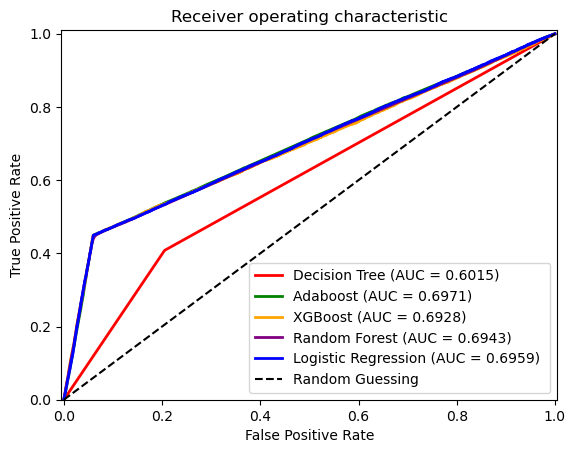

In [19]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.4f)' % AUC_dt)
plt.plot(fpr_ab, tpr_ab, color='green', lw=2, label='Adaboost (AUC = %0.4f)' % AUC_ab)
plt.plot(fpr_xg, tpr_xg,color='orange', lw=2, label='XGBoost (AUC = %0.4f)' % AUC_xg)
plt.plot(fpr_rf, tpr_rf,color='purple', lw=2, label='Random Forest (AUC = %0.4f)' % AUC_rf)
plt.plot(fpr_lr, tpr_lr, color="blue", lw=2, label="Logistic Regression (AUC = %0.4f) " %AUC_lr)

# Random Guess line:
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## SVM

### Split the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Encode the label to 1 or 0

In [21]:
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### Normalize the features

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Perform PCA to reduce the dimension

In [23]:
k = 8
my_pca = PCA(n_components = k)
X_train_new = my_pca.fit_transform(X_train_scaled)
X_test_new = my_pca.transform(X_test_scaled)

### Using Support Vector Machine Model

In [24]:
svm = SVC(probability=True)

In [25]:
svm.fit(X_train_new, y_train_encoded)

SVC(probability=True)

In [26]:
y_predict = svm.predict(X_test_new)

In [27]:
accuracy = accuracy_score(y_test_encoded, y_predict)

In [28]:
accuracy

0.8280518308163918

### Plot the ROC Curve

In [29]:
y_scores = svm.predict_log_proba(X_test_new)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

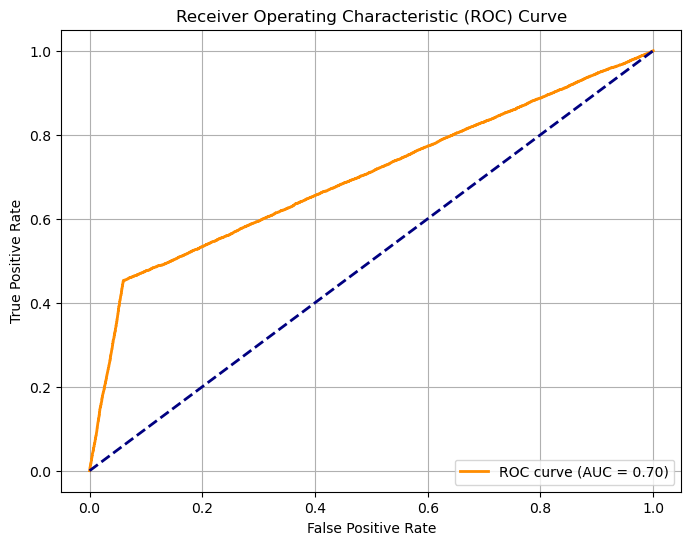

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Explained variance ratio: [0.06439733 0.05192955]


/var/folders/wd/l8n5ln7s4h92zgdgfplyw4380000gn/T/ipykernel_18420/335904184.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_lr[:, 0], X_pca_lr[:, 1], cmap='viridis')


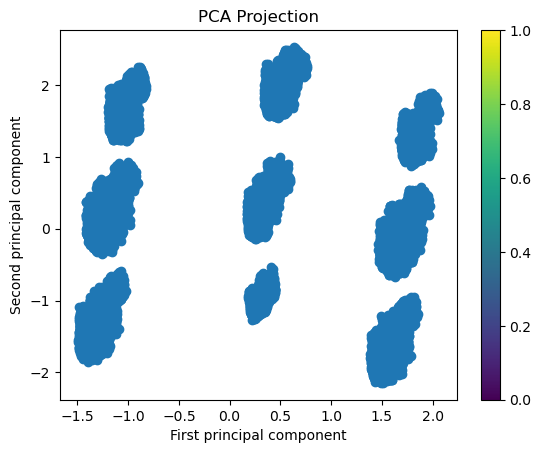

In [31]:
pca_lr = PCA(n_components=2)

X_pca_lr = pca_lr.fit_transform(X_train_scaled)

print("Explained variance ratio:", pca_lr.explained_variance_ratio_)

plt.scatter(X_pca_lr[:, 0], X_pca_lr[:, 1], cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA Projection')
plt.colorbar()
plt.show()

In [32]:
loadings_lr = pd.DataFrame(pca_lr.components_.T, columns=[f'PC{i+1}' for i in range(pca_lr.n_components_)], index=X.columns)
print(loadings_lr)

                                 PC1       PC2
Age                        -0.000645 -0.033865
Gender                     -0.005355 -0.009272
Family_History              0.041032  0.087374
Radiation_Exposure          0.028433  0.029550
Iodine_Deficiency           0.026677 -0.002450
Smoking                    -0.003738  0.037221
Obesity                    -0.002050  0.008388
Diabetes                   -0.000492  0.006319
TSH_Level                  -0.003410  0.005514
T3_Level                    0.007144 -0.029505
T4_Level                    0.002182 -0.003918
Nodule_Size                 0.008673  0.007524
Country_China              -0.018134 -0.058597
Country_Germany            -0.010470  0.011148
Country_India               0.048342  0.116139
Country_Japan              -0.005021  0.012474
Country_Nigeria            -0.008513 -0.028306
Country_Russia             -0.012826 -0.021480
Country_South Korea         0.003135 -0.036556
Country_UK                 -0.004383 -0.022528
Country_USA  

/var/folders/wd/l8n5ln7s4h92zgdgfplyw4380000gn/T/ipykernel_18420/449557740.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


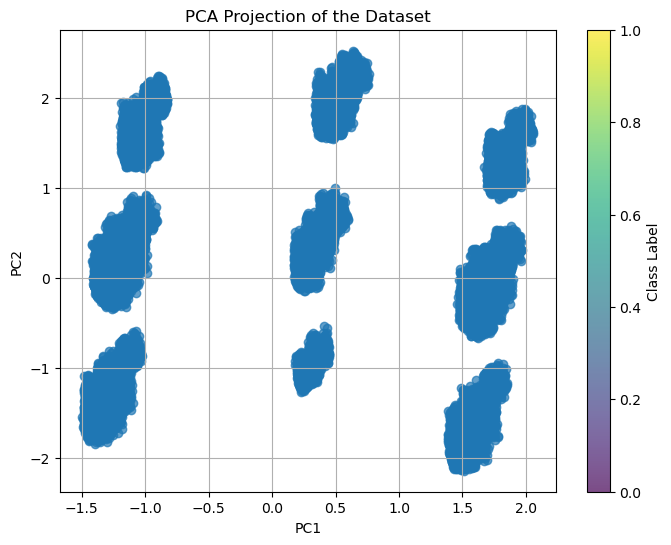

In [33]:
# Cancer PC1: influenced by thyroid cancer risk
# PC2: influenced by ethnicity Caucasian and Asian
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca_lr[:, 0],
    X_pca_lr[:, 1],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of the Dataset')
plt.colorbar(scatter, label='Class Label')
plt.grid(True)
plt.show()

# Data Visualization

### Heatmap correlation

In [34]:
# Calculate correlations between columns
cancer_cor = df.corr()

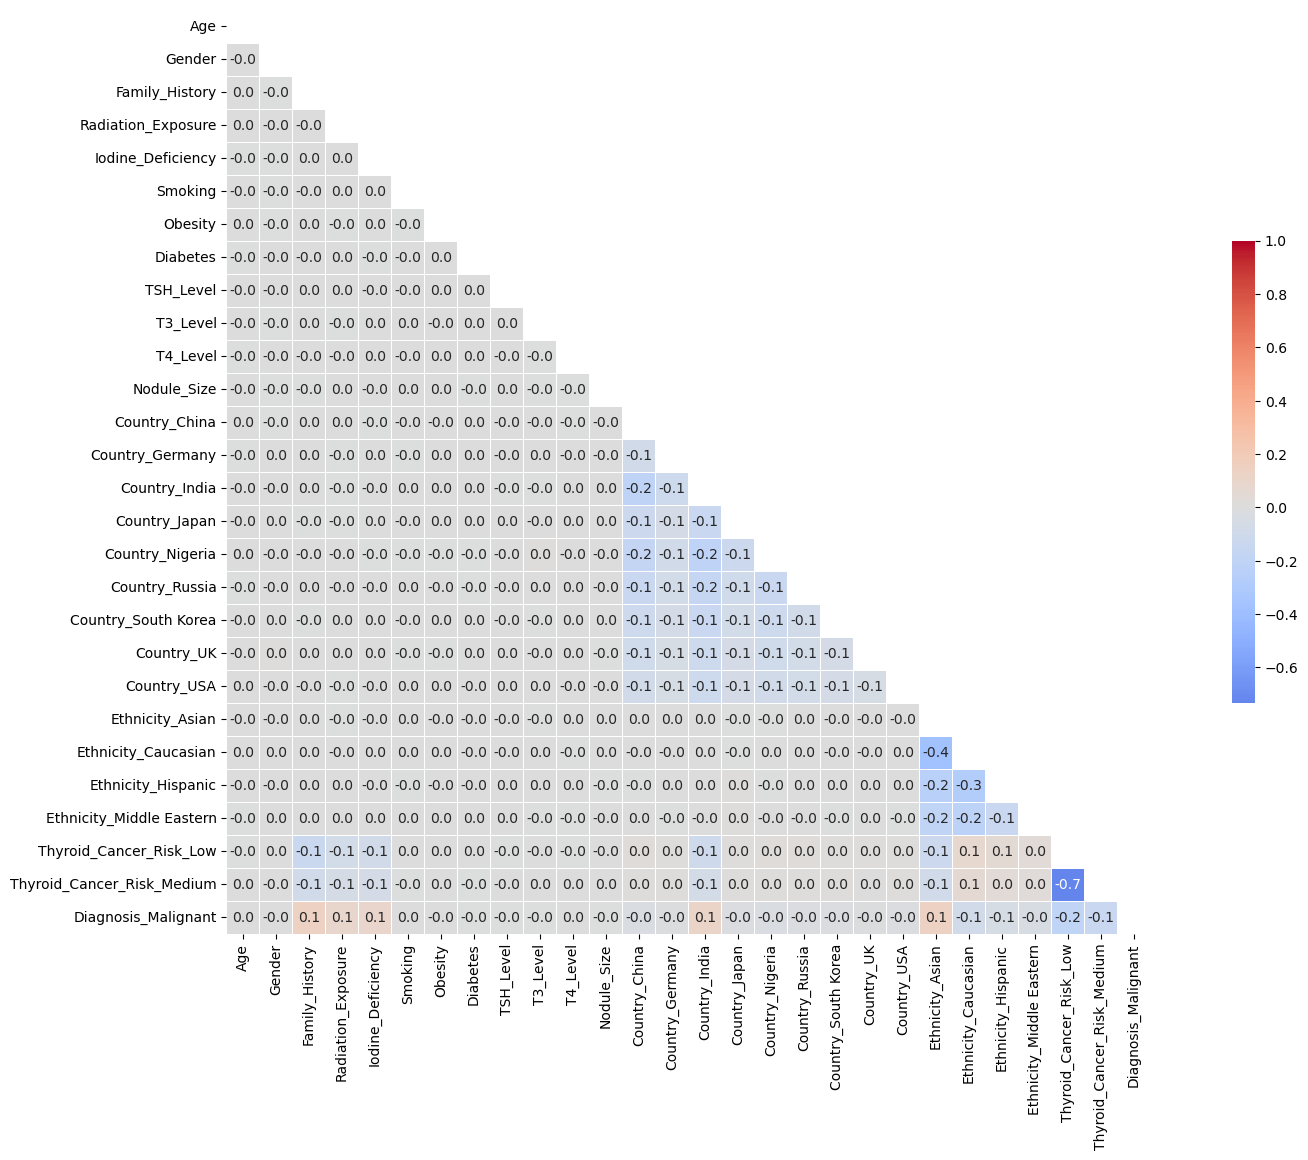

In [35]:
# Creating mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(cancer_cor, dtype=bool))

# Def heatmap
f, ax = plt.subplots(figsize=(21,12))

# Draw heatmap
cancer_cor = sns.heatmap(
    cancer_cor, mask=mask, vmax=1.0, center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, annot=True, fmt='.1f', cmap='coolwarm'
)

plt.show()


### Scatter Plot

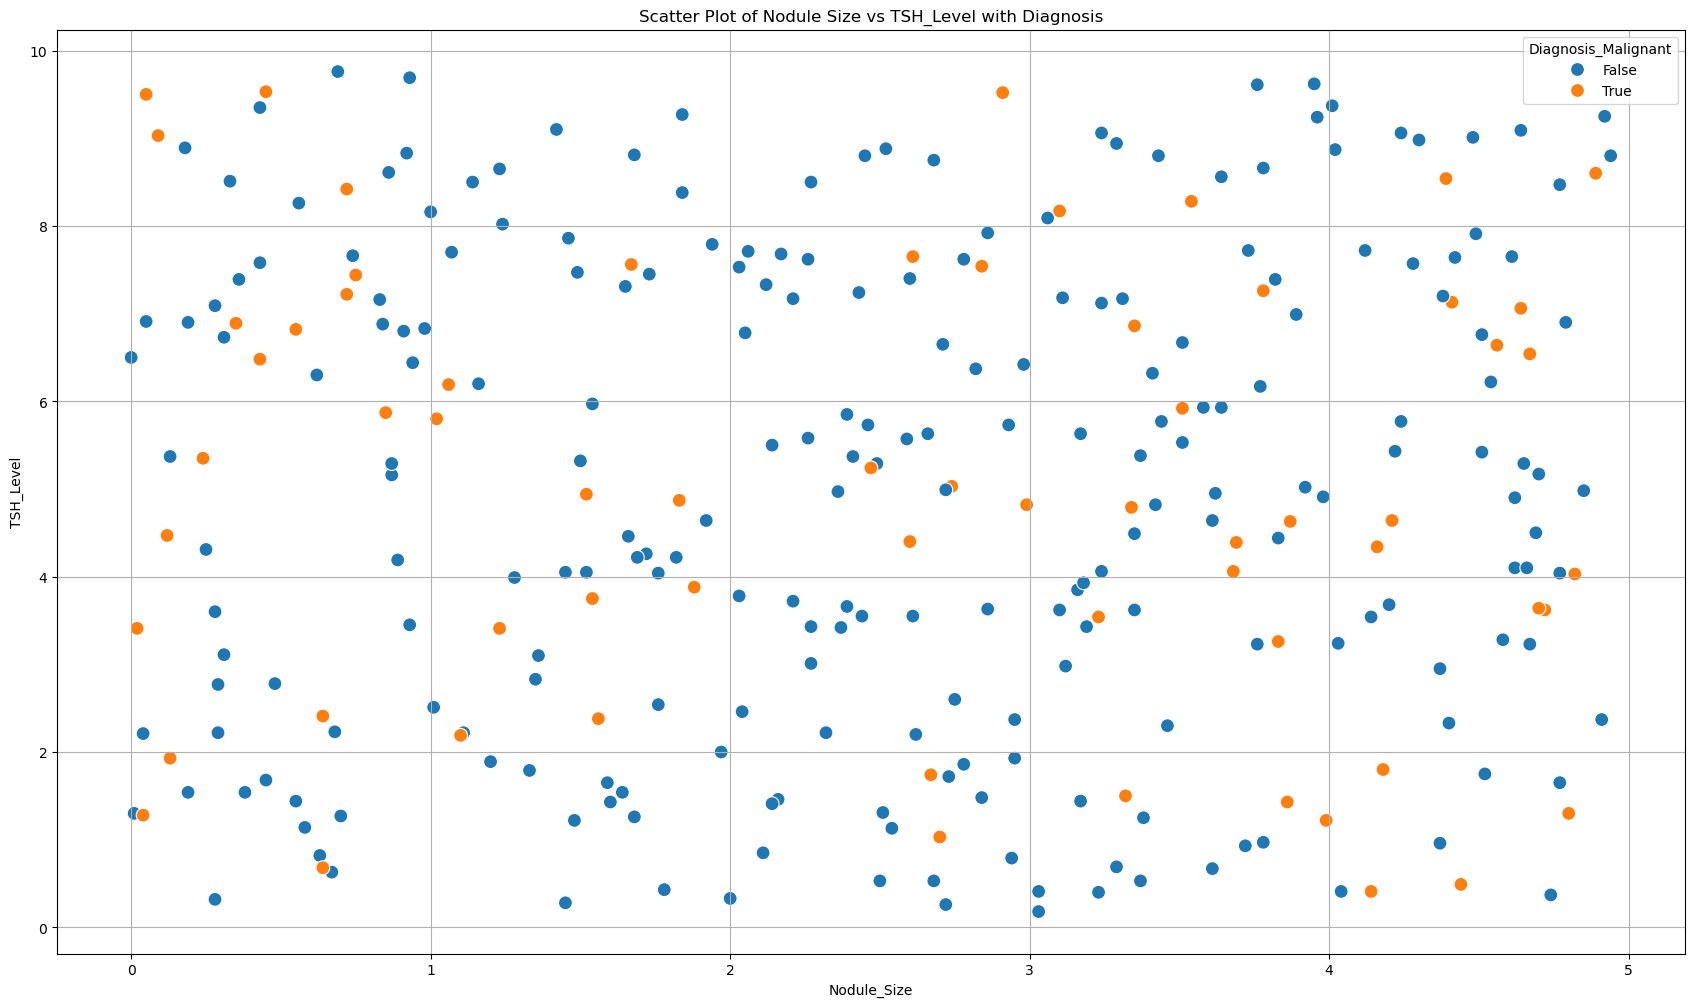

In [36]:
plt.figure(figsize=(21,12))
sns.scatterplot(x = 'Nodule_Size', y = 'TSH_Level', hue='Diagnosis_Malignant', data=df.sample(300), s = 100)
plt.title("Scatter Plot of Nodule Size vs TSH_Level with Diagnosis")
plt.grid(True)
plt.show()
